In [1]:
#Assignment 9
#Author: Pedro Nader
#This is the last assignment for the class.

Problem Definition: We are using the titanic dataset to create a predictive model to whether or not a passanger would survive based on all information provided. The best approach to this is using a decision tree classifier to predict 0 (died) or 1(survived). 

Model Evaluation: The model is very accurate with 86.48648648648648% accuracy. The hard part about creating this model is that becasue we had multiple categorical variables, we had to apply a one hot enconder, making the DF a little more complex.

Final remarks: In summary, the model is a good predictor of whether or not a passanger would survive. The most meaningful variables are the Sex and Age. As expected. 

In [2]:
#importing stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn import metrics
import os


In [3]:
#importing Df
df = pd.read_csv('titanic.csv')


In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#Drop NaN values
df = df.dropna()
df = df.reset_index()
df = df.drop(columns='index')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
178,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
179,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
180,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
181,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [6]:
#Drop the labels I won't use
modelDf = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
modelDf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,1,female,38.0,1,0,71.2833,C85,C
1,1,1,female,35.0,1,0,53.1000,C123,S
2,0,1,male,54.0,0,0,51.8625,E46,S
3,1,3,female,4.0,1,1,16.7000,G6,S
4,1,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
178,1,1,female,47.0,1,1,52.5542,D35,S
179,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
180,1,1,female,56.0,0,1,83.1583,C50,C
181,1,1,female,19.0,0,0,30.0000,B42,S


In [7]:
#For this dataSet, I will try to create a model that predicts if the passanger survived or not
#Best approach is using a decision tree


In [8]:
# Preprocessing the data so it it is only 0 and 1
#Using OneHot Enconder
ohe = OneHotEncoder()


In [9]:
feature_values = ohe.fit_transform(modelDf[['Sex','Cabin','Embarked']]).toarray()

In [10]:
#Getting Column Names
sexValues = modelDf['Sex'].unique().tolist()
cabinValues = modelDf['Cabin'].unique().tolist()
embarkedValues = modelDf['Embarked'].unique().tolist()

oheLabels = sexValues + cabinValues + embarkedValues
oheLabels

['female',
 'male',
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'D33',
 'B30',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'D47',
 'B86',
 'F2',
 'C2',
 'B19',
 'A7',
 'C49',
 'F4',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'B49',
 'D',
 'C22 C26',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'E33',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'C52',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'E12',
 'E63',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G63',
 'C62 C64',
 'E24',
 'C90',
 'C126',
 'C45',
 'E8',
 'B101',
 'C46',
 'D30

In [11]:
#Create new Df
featuresDf = pd.DataFrame(feature_values, columns=oheLabels)
featuresDf

,female,male,C85,C123,E46,G6,C103,D56,A6,C23 C25 C27,...,E49,D28,E17,A24,C50,B42,C148,C,S,Q
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
179,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
180,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
181,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
#Manipulating model df properly
#Joining on index to add the other columns
modelDf = modelDf.join(featuresDf.reset_index())
modelDf

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,index,...,E49,D28,E17,A24,C50,B42,C148,C,S,Q
0,1,1,female,38.0,1,0,71.2833,C85,C,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,female,35.0,1,0,53.1000,C123,S,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,male,54.0,0,0,51.8625,E46,S,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,3,female,4.0,1,1,16.7000,G6,S,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,1,female,58.0,0,0,26.5500,C103,S,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1,1,female,47.0,1,1,52.5542,D35,S,178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
179,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S,179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
180,1,1,female,56.0,0,1,83.1583,C50,C,180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
181,1,1,female,19.0,0,0,30.0000,B42,S,181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
modelDf = modelDf.drop(columns=['Sex','Cabin','Embarked'])
modelDf

,Survived,Pclass,Age,SibSp,Parch,Fare,index,female,male,C85,...,E49,D28,E17,A24,C50,B42,C148,C,S,Q
0,1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,35.0,1,0,53.1000,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,54.0,0,0,51.8625,2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,3,4.0,1,1,16.7000,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,1,58.0,0,0,26.5500,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1,1,47.0,1,1,52.5542,178,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
179,0,1,33.0,0,0,5.0000,179,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
180,1,1,56.0,0,1,83.1583,180,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
181,1,1,19.0,0,0,30.0000,181,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#Now that the DF has all features to the right and the value to be predicted on the right, we can create our Features and results.

In [14]:
#Splitting into features and Y
x = modelDf.iloc[:,1:]
y = modelDf['Survived']

In [15]:
#Creating Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
#Creating the classifier object form the DecisionTree class
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
#Save predicitons to one variable
y_pred = classifier.predict(x_test)

In [18]:
print('The model can predict if the passanger will live or die with ' + str(accuracy_score(y_pred, y_test)*100) +'% accuracy')

The model can predict if the passanger will live or die with 86.48648648648648% accuracy


In [19]:
#Confusion matrix to test for false positive or false negatives
idx = ['actual 0', 'actual 1']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  columns = ['pred 0', 'pred 1'],
                  index= idx)
cm

,pred 0,pred 1
actual 0,3,4
actual 1,1,29


[Text(0.28804347826086957, 0.9545454545454546, 'male <= 0.5\ngini = 0.462\nsamples = 146\nvalue = [53, 93]'),
 Text(0.13043478260869565, 0.8636363636363636, 'B18 <= 0.5\ngini = 0.168\nsamples = 65\nvalue = [6, 59]'),
 Text(0.08695652173913043, 0.7727272727272727, 'Fare <= 10.481\ngini = 0.119\nsamples = 63\nvalue = [4, 59]'),
 Text(0.043478260869565216, 0.6818181818181818, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.13043478260869565, 0.6818181818181818, 'A36 <= 0.5\ngini = 0.063\nsamples = 61\nvalue = [2, 59]'),
 Text(0.08695652173913043, 0.5909090909090909, 'D37 <= 0.5\ngini = 0.033\nsamples = 60\nvalue = [1, 59]'),
 Text(0.043478260869565216, 0.5, 'gini = 0.0\nsamples = 59\nvalue = [0, 59]'),
 Text(0.13043478260869565, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17391304347826086, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17391304347826086, 0.7727272727272727, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.44565217391304346, 0.

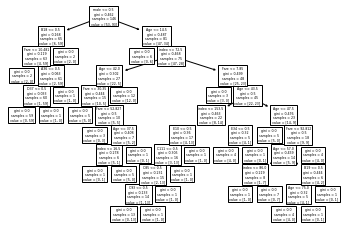

In [20]:
plot_tree(classifier, feature_names = modelDf.columns[1:])